In this notebook, I will explore some APIs to makesure those APIs are useful to our project.

# Google Trends API: Pytrends

### rate limit

One user reports that 1,400 sequential requests of a 4 hours timeframe got them to the limit. (Replicated on 2 networks)
It has been tested, and 60 seconds of sleep between requests (successful or not) appears to be the correct amount once you reach the limit.

In [67]:
# link for this API:
#     https://pypi.org/project/pytrends/#API

# connect to Google
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz = 360) 
    # hl is the language setting
    # tz is the Timezone Offset

# potential ways to break the rate limitation
# pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25) \
#  ,proxies=['https://34.203.233.13:80',], retries=2,\
#  backoff_factor=0.1, requests_args={'verify':False})

### Useful functions

In [68]:
# key words list
kw_list = ['Coffee',"Tea","bubble tea"] # maximum 5 words
# build payload
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
    # cat helps us fliter the result
    #     link: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
    # timeFrame: setting time range of the trends
    # geo: restrict the area the trends count for
    # gprop: web search(default), images, news, youtube, froogle(google shopping results)

In [69]:
# some function useful in the project
#       searching the past trends
result = pytrends.interest_over_time()
result 

,Coffee,Tea,bubble tea,isPartial
date,,,,
2017-03-12,62,55,1,False
2017-03-19,63,56,1,False
2017-03-26,64,53,1,False
2017-04-02,63,52,1,False
2017-04-09,63,52,1,False
...,...,...,...,...
2022-02-06,84,58,3,False
2022-02-13,81,58,3,False
2022-02-20,79,58,3,False


(0.0, 100.0)

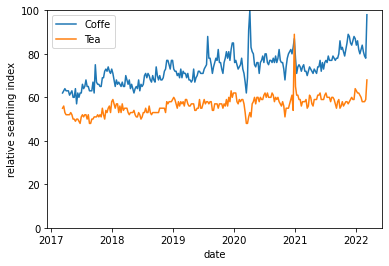

In [76]:
# visualize trends
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(x=result.index, y=result["Coffee"]) 
sns.lineplot(x=result.index, y=result["Tea"]) 
ax.set(ylabel='relative searhing index')
plt.legend(labels=["Coffe","Tea"])
plt.ylim(0, 100)


In [71]:
# search for real time trends
pytrends.trending_searches(pn='united_states').head()

,0
0,Spotify
1,Russell Wilson
2,Aaron Rodgers
3,Apple
4,Champions League


In [72]:
# The top trends in past year?
pytrends.top_charts('2021', hl='en-US', tz=300, geo='GLOBAL')

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [73]:
# suggestions words for searching
pytrends.suggestions(keyword = 'UCI')
    # return a list of dicts

[{'mid': '/m/0c5x_',
  'title': 'University of California Irvine',
  'type': 'Land-grant university in Irvine, California'},
 {'mid': '/g/1thk12n0',
  'title': 'UCI',
  'type': 'Movie theater in Florence, Italy'},
 {'mid': '/m/023twh',
  'title': 'Union Cycliste Internationale',
  'type': 'Sports governing body'},
 {'mid': '/g/1td21d6r',
  'title': 'UCI',
  'type': 'Movie theater in São Paulo, Brazil'},
 {'mid': '/g/1pzw9v2g9',
  'title': 'UCI Luxe',
  'type': 'Movie theater in Potsdam, Germany'}]

In [74]:
# pytrends.interest_by_region(resolution='CITY')
pytrends.interest_by_region(resolution='CITY', inc_low_vol=False, inc_geo_code=False)

KeyError: "['geoCode'] not in index"